# EV and Carbon Emissions


Our research question here will be: What is the causal effect of increased electric vehicle adoption in the United States on carbon emission caused by transportation?

Thus, the following will be assigned:

**Treatment Variable**: Above median EV adoption rate in a given year

**Control Variable**: Below median EV adoption rate in a given year

**Outcome**: United States' Carbon Emissions controlled for transportation

This question results in multiple possible confounders including but not limited to:

**wealth**: During a year where the nation is during a time of wealth or a higher economic activity (higher GDP), more vehicles or more emissions

**EV incentives**: While a releatively newley tracked confounder due to each state introducing their own and the federal government only doing their part relatively recently, EV incentives make people stop using gas powered cars by making them get electric powered ones or some even offer them to trade in old cars taking them off the roads to decrease carbon emissions.

**fuel price**: Higher gas prices will lead to an incentive to buy more electric vehicles and deterrent to use gas.

**energy production**: the mix of energy that is currently being produced in the United States. Different Presidents and legislatures have had different platforms pushing different forms of energy. This has made the energy grid either cleaner or dirtier for carbon emissions

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DATA102 Project'

df = pd.read_csv(path + '/light-duty-vehicles-2025-05-02.csv')
df

,Vehicle ID,Fuel ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,...,Drivetrain,Charging Rate Level 2 (kW),Charging Rate DC Fast (kW),Charging Speed Level 1 (miles added per hour of charging),Charging Speed Level 2 (miles added per hour of charging),Charging Speed DC Fast (miles added per hour of charging),Battery Voltage,Battery Capacity Amp Hours,Battery Capacity kWh,Seating Capacity
0,13939,57,490,29,Tonale eAWD,2025,NaN,NaN,77,29.0,...,AWD,6.6,NaN,3.0,15,NaN,304.0,51.0,15.5,5
1,13717,45,377,27,A4 quattro/S-Line/Allroad,2025,NaN,NaN,NaN,NaN,...,AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13718,45,377,27,A5 Sportback quattro,2025,NaN,NaN,NaN,NaN,...,AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13719,45,377,27,A6 quattro,2025,NaN,NaN,NaN,24.0,...,AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13720,45,377,27,A6 quattro/Allroad,2025,NaN,NaN,NaN,22.0,...,AWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,83,41,319,25,Flash,2000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3759,84,41,319,27,Force NiCd PbA NiMH,2000,13.7,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3760,58,3,221,27,Camry,2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3761,574,45,221,27,Prius,2000,52.0,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vehicle_data = pd.read_csv("/content/drive/MyDrive/DATA102 Project/light-duty-vehicles-2025-05-02.csv")
ev_count_state_annual = pd.read_csv("/content/drive/MyDrive/DATA102 Project/EV Registration Counts in 2023-Table 1.csv")
vehicles_registeration = pd.read_csv("/content/drive/MyDrive/DATA102 Project/Motor_Vehicle_Registrations_Dashboard_data.csv")
state_population = pd.read_csv("/content/drive/MyDrive/DATA102 Project/apportionment.csv")
gdp_state = pd.read_csv("/content/drive/MyDrive/DATA102 Project/gdp_per_state.csv", skiprows = 3)
incentive_per_state = pd.read_csv("/content/drive/MyDrive/DATA102 Project/laws_and_incentives (May 2 2025).csv")
carbon_emission = pd.read_csv("/content/drive/MyDrive/DATA102 Project/state_carbon_year.csv", skiprows=4)

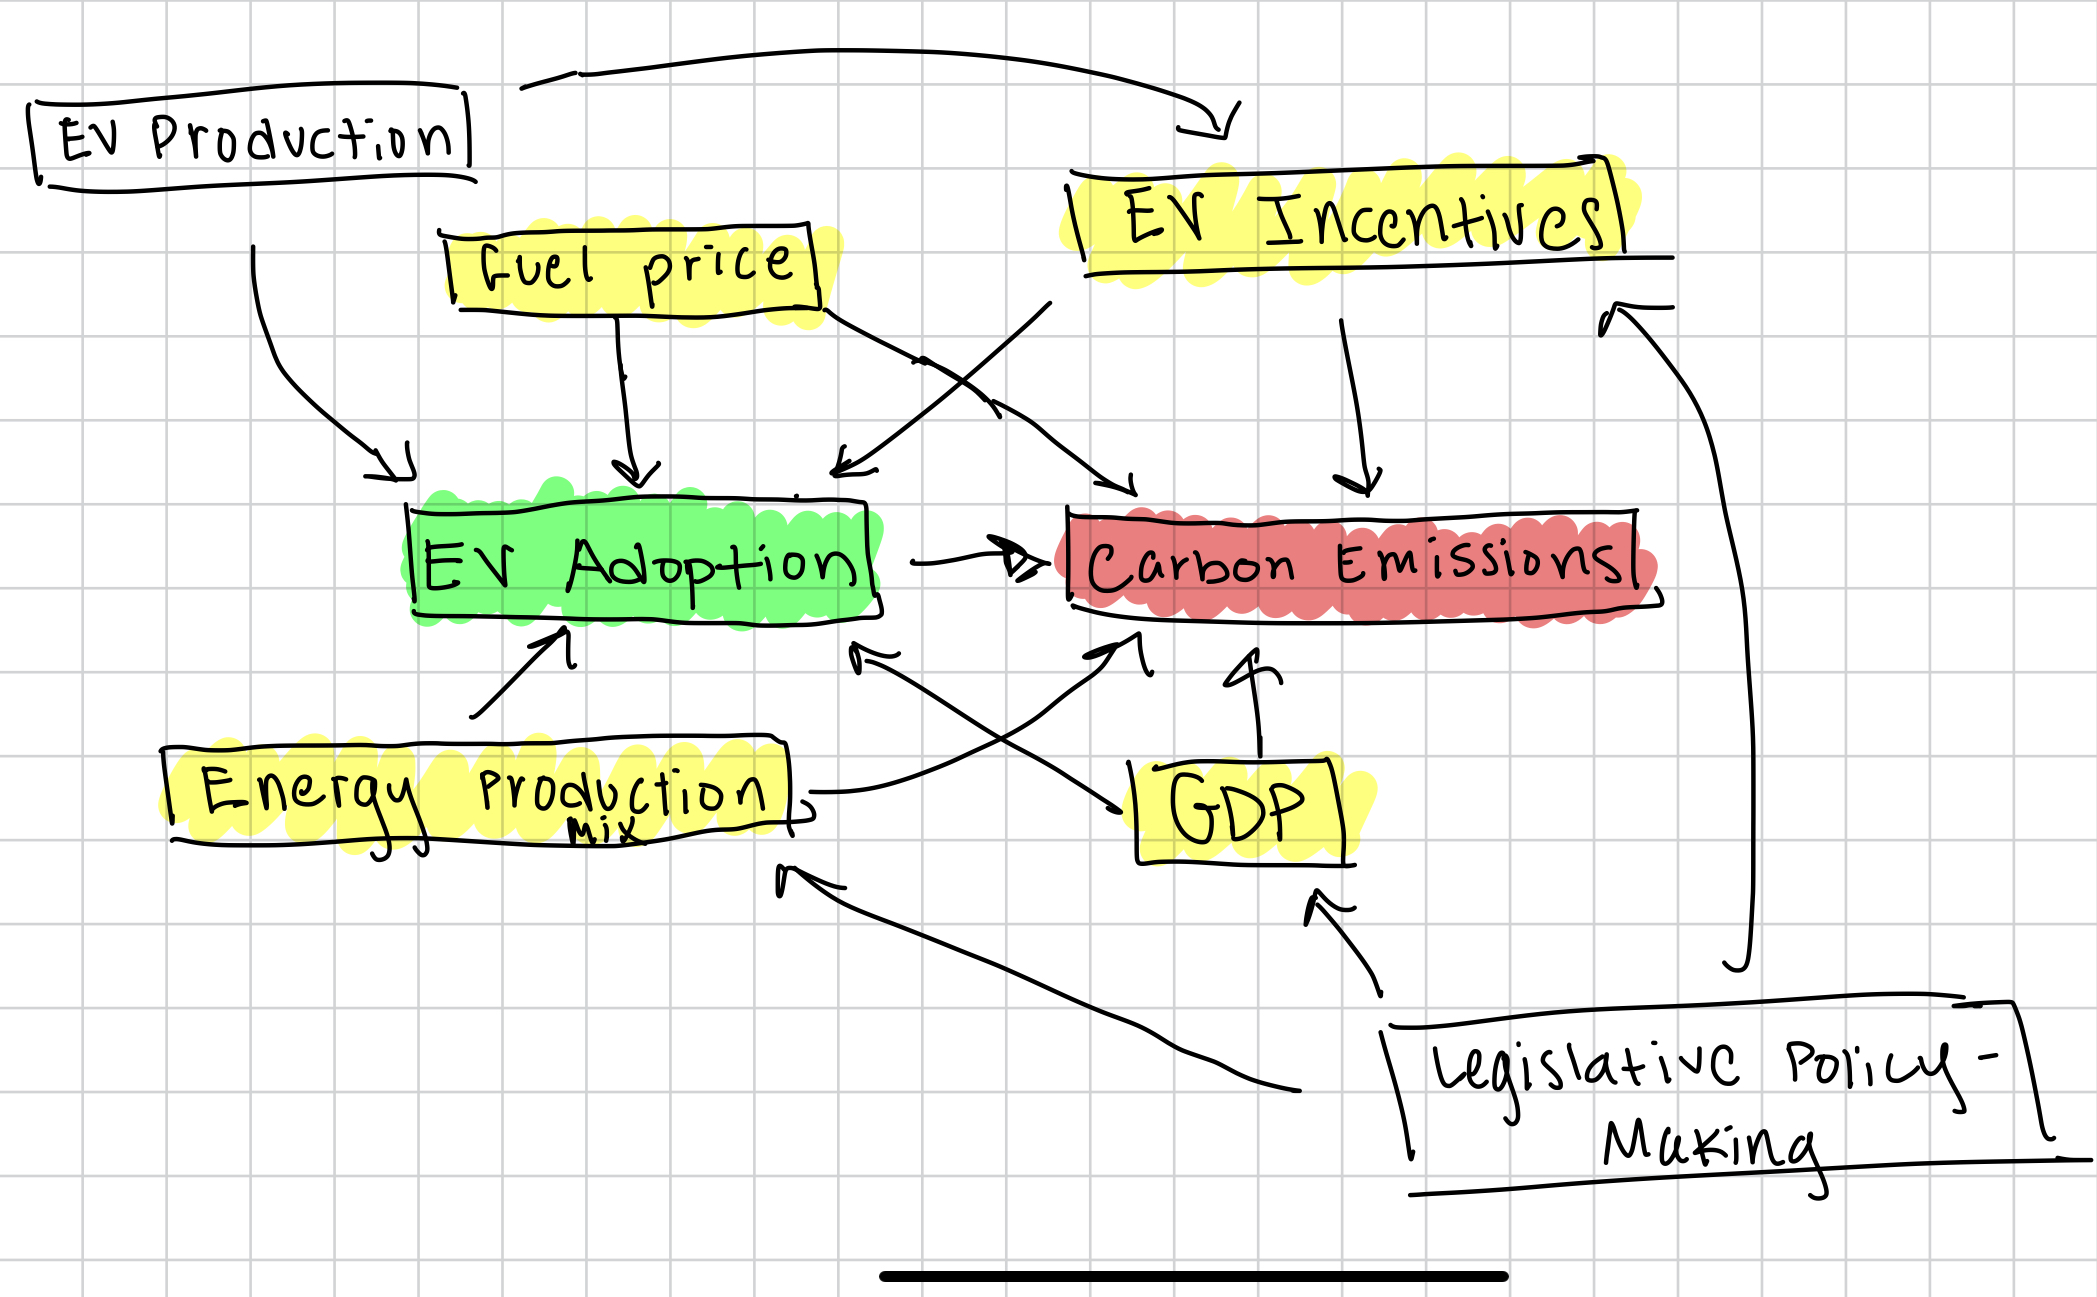

In [ ]:
from PIL import Image
dag = Image.open('/content/drive/MyDrive/DATA102 Project/DAG.jpg')
dag

In [ ]:
vehicle_data.head(1)

,Vehicle ID,Fuel ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,...,Drivetrain,Charging Rate Level 2 (kW),Charging Rate DC Fast (kW),Charging Speed Level 1 (miles added per hour of charging),Charging Speed Level 2 (miles added per hour of charging),Charging Speed DC Fast (miles added per hour of charging),Battery Voltage,Battery Capacity Amp Hours,Battery Capacity kWh,Seating Capacity
0,13939,57,490,29,Tonale eAWD,2025,NaN,NaN,77,29.0,...,AWD,6.6,NaN,3.0,15,NaN,304.0,51.0,15.5,5


In [ ]:
vehicle_data.columns

Index(['Vehicle ID', 'Fuel ID', 'Manufacturer ID', 'Category ID', 'Model',
       'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Engine/Motor(s) Description', 'Manufacturer',
       'Manufacturer URL', 'Category', 'Fuel Code', 'Fuel',
       'Electric-Only Range', 'Total Range', 'PHEV Type', 'Notes',
       'Drivetrain', 'Charging Rate Level 2 (kW)',
       'Charging Rate DC Fast (kW)',
       'Charging Speed Level 1 (miles added per hour of charging)',
       'Charging Speed Level 2 (miles added per hour of charging)',
       'Charging Speed DC Fast (miles added per hour of charging)',
       'Battery Voltage', 'Battery Capacity Amp Hours', 'Battery Capacity kWh',
       'Seating Capacity'],
      dtype='object')

In [ ]:
vehicles_registeration.head(1)

,year,state,Auto,Bus,Truck,Motorcycle
0,1900,Alabama,40.0,0.0,0.0,0.0


In [ ]:
state_population.head(1)

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,"2,138,093",16.9,42.2,25.0,10.0,1.0,"213,809"


In [ ]:
gdp_state.head(2)

,GeoFips,GeoName,1929,1930,1931,1932,1933,1934,1935,1936,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,00000,United States,699,621,528,402,375,427,477,539,...,48062.0,48974.0,51006.0,53311.0,55567.0,59114.0,64450.0,66096.0,69418.0,72425.0
1,01000,Alabama,319,263,220,159,164,207,216,249,...,38189.0,38704.0,39968.0,41324.0,42998.0,45843.0,50495.0,51660.0,54112.0,56684.0


In [ ]:
incentive_per_state.head(1)

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Sequence Number,Type,Agency,...,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,References,Status,Status Date
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...,2005-08-10 00:00:00 UTC,2021-11-15 00:00:00 UTC,False,54.0,Incentives,U.S. Department of Transportation,...,NaN,NaN,NaN,BIOD|ETH|ELEC|HY|IR|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV|TRANS,https://www.congress.gov/public-laws/117th-con...,amended,2021-11-15


In [ ]:
carbon_emission.head(1)

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,Percent,Absolute,Percent.1,Absolute.1
0,Alabama,102.7,98.5,105.0,109.6,108.8,107.8,108.1,111.7,106.7,...,108.1,111.9,105.8,98.0,108.3,109.3,6.4%,6.6,0.9%,1.0


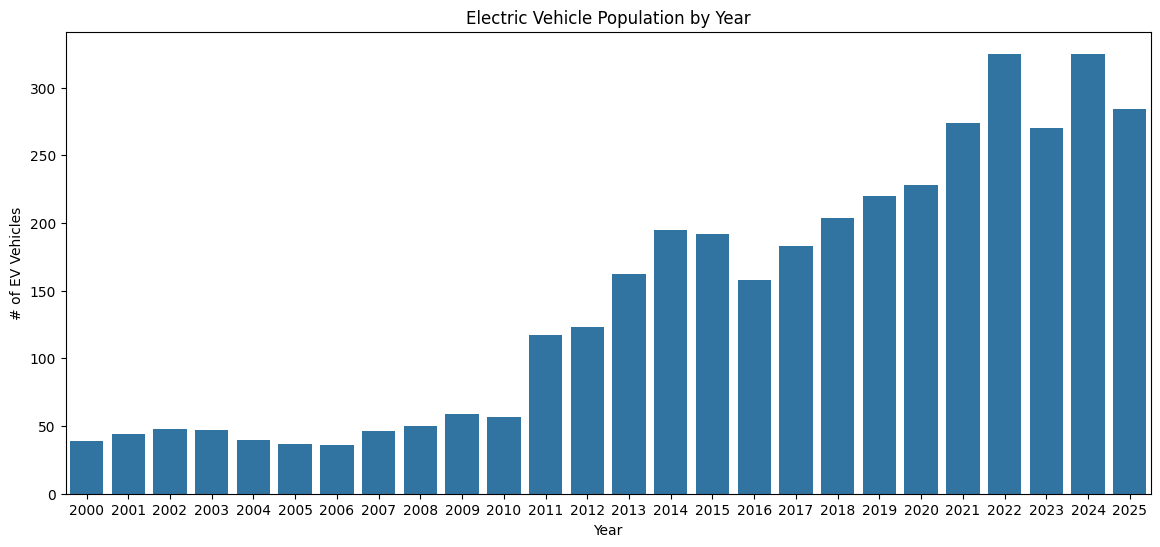

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_year_counts = vehicle_data['Model Year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
sns.barplot(x=model_year_counts.index, y=model_year_counts.values)
plt.title('Electric Vehicle Population by Year')
plt.xlabel('Year')
plt.ylabel('# of EV Vehicles')
plt.show()

We see here that EV sales in the United States (we are making the assumption car model = year of sale since they eventually would have to be sold). EV tax credits became law in 2008, and we can slightly see the first slither of sales matching that with our graph, however the boom really happens in 2018 and after Covid; and it is only growing exponentially so we could make another type of inference with our question.

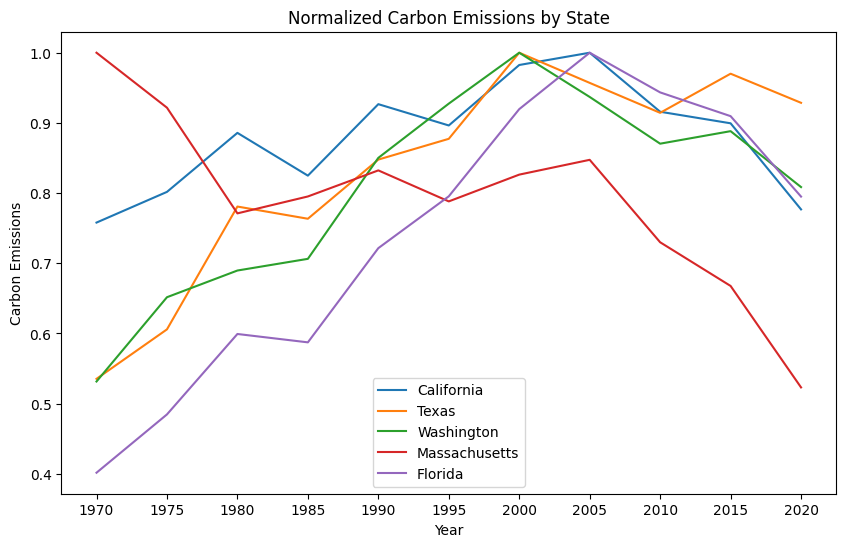

In [ ]:
states = ['California', 'Texas', 'Washington', 'Massachusetts', 'Florida']
carbon_emission_subset = carbon_emission[carbon_emission['State'].isin(states)]
years = np.arange(1970, 2023, 5).astype(str)


plt.figure(figsize=(10, 6))
for state in states:
    state_data = carbon_emission_subset[carbon_emission_subset['State'] == state]
    #normalize values since they were all over the place, but these states are relevant
    y = state_data[years].values.flatten().astype(float)
    y_normal = y / y.max()
    plt.plot(years, y_normal, label=state)

plt.title('Normalized Carbon Emissions by State')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions')
plt.legend()
plt.show()

California and Texas are the U.S. largest producers of Carbon Emissions, however, relatively to themselves we see that California has always been generating a high production of carbon emissions and has failed to improve, while Texas on the otherhand has significantly gotten worse over the last 30 years before the new century.

We included Massachusetts because they were one of the states with the most EV incentives, thus making it a valuable case study to see where they lie in carbon emissions. Here we notice they have been improving on their emissions since the late 1900s entering the modern era; dramatically better than any of the other states.

Washington also has a relatively large amount of EV incentives, however, they are not a large maker of carbon emissions. But, relative to our research question, we see there is a possibility that EVs could have provided a slight improvement.

# EV GLM

In [ ]:
# Checking all schema
print(ev_count_state_annual.iloc[2:].head())
print(state_population.head())
print(carbon_emission.head())

   Unnamed: 0  Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4  Unnamed: 5  \
2         NaN     Alabama     13,047         NaN        NaN         NaN   
3         NaN      Alaska      2,697         NaN        NaN         NaN   
4         NaN     Arizona     89,798         NaN        NaN         NaN   
5         NaN    Arkansas      7,108         NaN        NaN         NaN   
6         NaN  California  1,256,646         NaN        NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 29  \
2         NaN         NaN         NaN         NaN  ...          NaN   
3         NaN         NaN         NaN         NaN  ...          NaN   
4         NaN         NaN         NaN         NaN  ...          NaN   
5         NaN         NaN         NaN         NaN  ...          NaN   
6         NaN         NaN         NaN         NaN  ...          NaN   

   Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  \
2          NaN          NaN          NaN          Na

In [ ]:
pops = state_population[state_population['Geography Type'] == 'State'].iloc[:, 0:4]
pops_no_type = pops.drop('Geography Type', axis=1)
pops_no_type.head(1)

,Name,Year,Resident Population
0,Alabama,1910,"2,138,093"


In [ ]:
# Predict 2023 population

from sklearn.linear_model import LinearRegression

predictions = []
pop_df = pops_no_type.copy()
pop_df['Resident Population'] = pop_df['Resident Population'].str.replace(',', '').astype(float)
for state, group in pop_df.groupby('Name'):
    X = group['Year'].values.reshape(-1, 1)
    y = group['Resident Population'].values
    model = LinearRegression()
    model.fit(X, y)

    pred_2023 = model.predict([[2023]])[0]
    predictions.append({'Name': state, '2023 Prediction': pred_2023})

pops_pred = pd.DataFrame(predictions)
pops_pred.head(1)

,Name,2023 Prediction
0,Alabama,5.013609e+06


In [ ]:
ev_count_state_annual = ev_count_state_annual.iloc[2:]
ev_count_state_annual[['State', 'ev_count']] = ev_count_state_annual[['Unnamed: 1', 'Unnamed: 2']]
ev_count = ev_count_state_annual[['State', 'ev_count']].reset_index(drop=True)
ev_count.head()

<ipython-input-17-db32b727e7f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_count_state_annual[['State', 'ev_count']] = ev_count_state_annual[['Unnamed: 1', 'Unnamed: 2']]
<ipython-input-17-db32b727e7f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_count_state_annual[['State', 'ev_count']] = ev_count_state_annual[['Unnamed: 1', 'Unnamed: 2']]


,State,ev_count
0,Alabama,"13,047"
1,Alaska,"2,697"
2,Arizona,"89,798"
3,Arkansas,"7,108"
4,California,"1,256,646"


In [ ]:
# ev_count per capita per state

ev_pops_merged = pd.merge(ev_count, pops_pred, left_on='State', right_on='Name', how='inner')
ev_per_cap = ev_pops_merged.drop('Name', axis=1)
ev_per_cap['ev_count_per_capita'] = ev_per_cap['ev_count'].str.replace(',', '').astype(float) / ev_per_cap['2023 Prediction']
ev_per_cap.head()

,State,ev_count,2023 Prediction,ev_count_per_capita
0,Alabama,"13,047",5.013609e+06,0.002602
1,Alaska,"2,697",7.433633e+05,0.003628
2,Arizona,"89,798",6.301680e+06,0.014250
3,Arkansas,"7,108",2.881268e+06,0.002467
4,California,"1,256,646",4.072660e+07,0.030856


In [ ]:
state_emissions = carbon_emission[:51]
state_emissions.head(1)

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,Percent,Absolute,Percent.1,Absolute.1
0,Alabama,102.7,98.5,105.0,109.6,108.8,107.8,108.1,111.7,106.7,...,108.1,111.9,105.8,98.0,108.3,109.3,6.4%,6.6,0.9%,1.0


In [ ]:
# Predict 2023 Emissions

records = []
for idx, row in state_emissions.iterrows():
    state = row['State']
    for year in range(1970, 2023):  # Up to 2022
        value = row.get(str(year))
        if pd.notnull(value):
            records.append({'State': state, 'Year': int(year), 'Emissions': value})

emissions_df = pd.DataFrame(records)

predictions = []
for state, group in emissions_df.groupby('State'):
    X = group['Year'].values.reshape(-1, 1)
    y = group['Emissions'].values
    model = LinearRegression()
    model.fit(X, y)
    pred_2023 = model.predict([[2023]])[0]
    predictions.append({'State': state, '2023 Prediction': pred_2023})

emissions_pred = pd.DataFrame(predictions)
emissions_pred.head()

,State,2023 Prediction
0,Alabama,129.068940
1,Alaska,45.988752
2,Arizona,106.938099
3,Arkansas,70.810522
4,California,367.915312


In [ ]:
import statsmodels.api as sm

df = pd.merge(ev_per_cap, emissions_pred, on='State', how='inner')

median_ev = df['ev_count_per_capita'].median()
df['Above_Median_EV_Adoption'] = (df['ev_count_per_capita'] > median_ev).astype(int)

X = df[['Above_Median_EV_Adoption']]
X = sm.add_constant(X)
y = df['2023 Prediction_y']

model = sm.GLM(y, X, family=sm.families.Gaussian())
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      2023 Prediction_y   No. Observations:                   51
Model:                            GLM   Df Residuals:                       49
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          13161.
Method:                          IRLS   Log-Likelihood:                -313.21
Date:                Mon, 12 May 2025   Deviance:                   6.4488e+05
Time:                        20:55:21   Pearson chi2:                 6.45e+05
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01638
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

  For our model we decided to use a Gaussian GLM due to the fact that we are dealing with continuous numeric variables in our outcome: CO2 emissions related to transportation, and our dependent variables are

#EV OLS

In [ ]:
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      2023 Prediction_y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8022
Date:                Mon, 12 May 2025   Prob (F-statistic):              0.375
Time:                        20:55:38   Log-Likelihood:                -313.21
No. Observations:                  51   AIC:                             630.4
Df Residuals:                      49   BIC:                             634.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
ev_vehicles = pd.read_csv("/content/drive/MyDrive/DATA102 Project/Electric_Vehicle_Population_Data 3.csv")

In [ ]:
ev_vehicles.head(1)
carbon_emission.head(1)

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,Percent,Absolute,Percent.1,Absolute.1
0,Alabama,102.7,98.5,105.0,109.6,108.8,107.8,108.1,111.7,106.7,...,108.1,111.9,105.8,98.0,108.3,109.3,6.4%,6.6,0.9%,1.0


In [ ]:
elig_types = ev_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()
v_types = ev_vehicles['Electric Vehicle Type'].unique()
states = ev_vehicles['State'].unique()
v_types, elig_types, states

(array(['Battery Electric Vehicle (BEV)',
        'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object),
 array(['Clean Alternative Fuel Vehicle Eligible',
        'Not eligible due to low battery range',
        'Eligibility unknown as battery range has not been researched'],
       dtype=object),
 array(['WA', 'CA', 'IL', 'NE', 'MO', 'AZ', 'VA', 'KY', 'NC', 'MD', 'DC',
        'WY', 'GA', 'OR', 'FL', 'MS', 'TX', 'AL', 'HI', 'CO', 'CT', 'LA',
        'MT', 'NV', 'NY', 'NJ', 'OH', 'DE', 'PA', 'IN', 'NH', 'BC', 'AR',
        'ID', 'UT', 'SC', 'KS', 'AK', 'AP', 'MA', 'MN'], dtype=object))

In [ ]:
# Count BEVs that are eligible for alt cars per state

elig_BEVs = ev_vehicles[(ev_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible")
                      & (ev_vehicles["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)")]
elig_BEVs.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [ ]:
elig_BEVs_state = (elig_BEVs.groupby("State")
                            .size()
                            .reset_index(name='Count')
                            .sort_values(by='Count', ascending=False)
                  )

elig_BEVs_state.head()

,State,Count
27,WA,46995
5,CA,28
26,VA,11
24,TX,7
14,MD,7


In [ ]:
elig_BEVs_WA = elig_BEVs[elig_BEVs['State'] == 'WA']
elig_BEVs_WA.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


In [ ]:
count_states = (ev_vehicles.groupby('State')
                           .size()
                           .reset_index(name='Count')
                           .sort_values(by='Count', ascending=False)
                )
count_states.head()

,State,Count
39,WA,150141
6,CA,92
38,VA,35
21,MD,33
36,TX,20


In [ ]:
elig_BEVs_count = (elig_BEVs.groupby('State')
                            .size()
                            .reset_index(name='Count')
                            .sort_values(by='Count', ascending=False)
                  )
elig_BEVs_count.head()

,State,Count
27,WA,46995
5,CA,28
26,VA,11
24,TX,7
14,MD,7


In [ ]:
elig_BEVs_prop_by_state = elig_BEVs_count.merge(count_states, on='State')
elig_BEVs_prop_by_state['BEV_prop'] = elig_BEVs_prop_by_state['Count_x'] / elig_BEVs_prop_by_state['Count_y']
elig_BEVs_prop_by_state = elig_BEVs_prop_by_state.sort_values('BEV_prop', ascending=False)
elig_BEVs_prop_by_state[['State', 'BEV_prop']].head()

,State,BEV_prop
25,NH,1.0
24,MN,1.0
20,AP,1.0
17,BC,1.0
14,AR,1.0


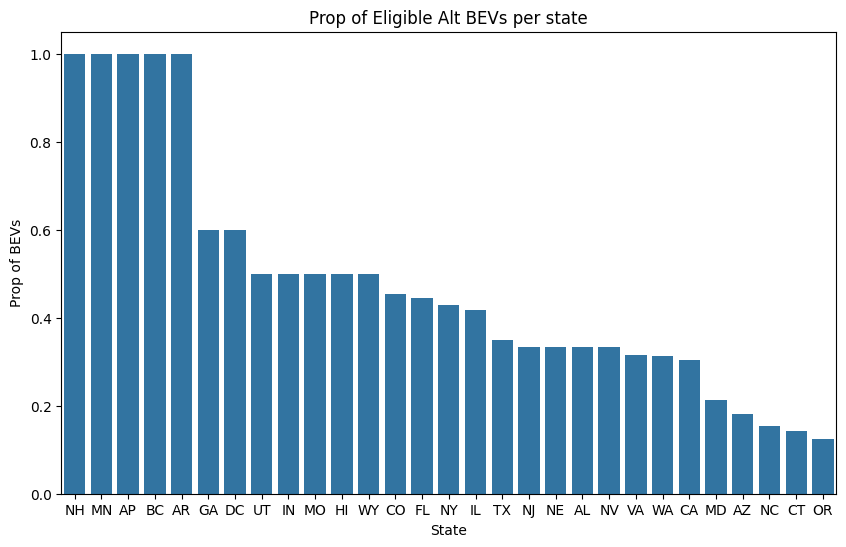

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=elig_BEVs_prop_by_state['State'], y=elig_BEVs_prop_by_state['BEV_prop'])
plt.title('Prop of Eligible Alt BEVs per state')
plt.xlabel('State')
plt.ylabel('Prop of BEVs')
plt.show()

This data will inform how we answer our research question because it shows the proportion of specifically Battery EVs that are eligible to be alternative cars. This information, when correlated with emissions data, will help visualize and inform the relationship between BEV ownership and carbon emissions on a state basis.

We want to verify the validity of our EDA as the first 5 states (NH, MN, AP, BC, AR), all come out as 1:1, Eligible BEVs:Total vehicles.

Later on, we can investigate the difference between Eligible BEV and Eligible PIEV on carbon emissions data. This will then let us better assess the causal effect of EV ownership on carbon emissions by helping us determine the proportion of effect coming from PIEVs and BEVs. This will help us normalize the data.

# Weather

Loading the Data + Data Wrangling


In [ ]:
!pip install -U gdown
import gdown
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #load in libraries

gdown.download(f'https://drive.google.com/uc?id=1cMAChGtEDUtkgig1cJN02KECQC1pWBUL', 'weather_data.csv')
gdown.download(f'https://drive.google.com/uc?id=121nYw6MobeFnA7ty-WM2JFstXDydmyMw', 'eia.csv')

df = pd.read_csv("weather_data.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1cMAChGtEDUtkgig1cJN02KECQC1pWBUL
To: /content/weather_data.csv
100%|██████████| 626k/626k [00:00<00:00, 7.33MB/s]
Downloading...
From: https://drive.google.com/uc?id=121nYw6MobeFnA7ty-WM2JFstXDydmyMw
To: /content/eia.csv
100%|██████████| 2.52M/2.52M [00:00<00:00, 18.3MB/s]


,Unnamed: 0,date,datatype,station,attributes,value
0,0,2024-01-01T00:00:00,TMAX,GHCND:USW00093134,",,W,2400",67.0
1,1,2024-01-02T00:00:00,TMAX,GHCND:USW00093134,",,W,2400",68.0
2,2,2024-01-03T00:00:00,TMAX,GHCND:USW00093134,",,W,2400",65.0
3,3,2024-01-04T00:00:00,TMAX,GHCND:USW00093134,",,W,2400",66.0
4,4,2024-01-05T00:00:00,TMAX,GHCND:USW00093134,",,W,2400",66.0


In [ ]:
weather_pivot = df.pivot_table(index='date', columns = 'datatype', values = 'value', aggfunc = 'mean').reset_index() # data cleaning
weather_pivot

datatype,date,AWND,PRCP,TMAX,TMIN
0,2024-01-01T00:00:00,2.900000,0.000000,62.714286,45.285714
1,2024-01-02T00:00:00,4.142857,0.154286,62.428571,43.857143
2,2024-01-03T00:00:00,5.314286,0.132857,59.428571,46.714286
3,2024-01-04T00:00:00,4.157143,0.000000,62.000000,43.285714
4,2024-01-05T00:00:00,3.871429,0.000000,63.571429,42.714286
...,...,...,...,...,...
361,2024-12-27T00:00:00,6.185714,0.138571,62.428571,50.714286
362,2024-12-28T00:00:00,4.985714,0.115714,64.857143,49.857143
363,2024-12-29T00:00:00,6.171429,0.127143,63.428571,46.857143
364,2024-12-30T00:00:00,5.557143,0.000000,63.285714,45.714286


In [ ]:
eia_df = pd.read_csv('eia.csv', skiprows=3)
eia_df

,UTC Timestamp (Interval Ending),Local Timestamp Pacific Time (Interval Beginning),Local Timestamp Pacific Time (Interval Ending),Local Date,Hour Number,CAISO Total Actual Load (MW),The Metropolitan Water District of Southern California Actual Load (MW),Pacific Gas and Electric Actual Load (MW),Southern California Edison Actual Load (MW),San Diego Gas & Electric Actual Load (MW),...,Public Service Company of New Mexico Actual Load (MW),Puget Sound Energy Actual Load (MW),Seattle City Light Actual Load (MW),Salt River Project Actual Load (MW),TEPC Actual Load (MW),Turlock Irrigation District Actual Load (MW),TPWR Actual Load (MW),WALC Actual Load (MW),WALCAEPCO Actual Load (MW),WALCDSW Actual Load (MW)
0,2024-01-01 09:00:00,2024-01-01 00:00:00,2024-01-01 01:00:00,2024-01-01,1,21598.0,122.0,9900.0,9380.0,2127.0,...,1534.0,2786.0,1015.0,2907.0,1162.0,234.0,486.0,657.0,374.0,158.0
1,2024-01-01 10:00:00,2024-01-01 01:00:00,2024-01-01 02:00:00,2024-01-01,2,21000.0,123.0,9597.0,9076.0,2134.0,...,1516.0,2726.0,1000.0,2899.0,1159.0,230.0,478.0,661.0,373.0,160.0
2,2024-01-01 11:00:00,2024-01-01 02:00:00,2024-01-01 03:00:00,2024-01-01,3,20396.0,121.0,9252.0,8890.0,2061.0,...,1520.0,2689.0,987.0,2878.0,1160.0,227.0,471.0,665.0,374.0,161.0
3,2024-01-01 12:00:00,2024-01-01 03:00:00,2024-01-01 04:00:00,2024-01-01,4,19911.0,120.0,9080.0,8651.0,1986.0,...,1537.0,2699.0,980.0,2854.0,1187.0,225.0,472.0,671.0,381.0,161.0
4,2024-01-01 13:00:00,2024-01-01 04:00:00,2024-01-01 05:00:00,2024-01-01,5,19743.0,120.0,9050.0,8577.0,1917.0,...,1569.0,2768.0,996.0,2924.0,1234.0,224.0,483.0,698.0,398.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,2025-01-01 04:00:00,2024-12-31 19:00:00,2024-12-31 20:00:00,2024-12-31,20,25087.0,208.0,11307.0,10952.0,2543.0,...,1688.0,3639.0,1305.0,3209.0,1170.0,292.0,649.0,580.0,331.0,169.0
8191,2025-01-01 05:00:00,2024-12-31 20:00:00,2024-12-31 21:00:00,2024-12-31,21,24354.0,208.0,10967.0,10667.0,2433.0,...,1670.0,3484.0,1246.0,3165.0,1144.0,282.0,620.0,601.0,354.0,165.0
8192,2025-01-01 06:00:00,2024-12-31 21:00:00,2024-12-31 22:00:00,2024-12-31,22,23767.0,208.0,10614.0,10503.0,2360.0,...,1630.0,3315.0,1187.0,3095.0,1117.0,274.0,590.0,626.0,382.0,159.0
8193,2025-01-01 07:00:00,2024-12-31 22:00:00,2024-12-31 23:00:00,2024-12-31,23,23011.0,208.0,10226.0,10237.0,2257.0,...,1602.0,3142.0,1128.0,3029.0,1084.0,264.0,560.0,614.0,375.0,154.0


In [ ]:
eia_daily = eia_df.groupby('Local Date'). agg({'CAISO Total Actual Load (MW)': 'mean'}).reset_index() #roll up
eia_daily

,Local Date,CAISO Total Actual Load (MW)
0,2024-01-01,21497.083333
1,2024-01-02,23848.913043
2,2024-01-03,21705.666667
3,2024-01-04,24937.066667
4,2024-01-05,23917.958333
...,...,...
340,2024-12-27,24211.666667
341,2024-12-28,22927.041667
342,2024-12-29,22811.708333
343,2024-12-30,23799.583333


Data Transformation

In [ ]:
weather_pivot['date'] = pd.to_datetime(weather_pivot['date'])
eia_daily['Local Date'] = pd.to_datetime(eia_daily['Local Date']) #data cleaning

In [ ]:
combined_df = eia_daily.merge(weather_pivot, left_on = 'Local Date', right_on = 'date', how = 'inner')
combined_df

,Local Date,CAISO Total Actual Load (MW),date,AWND,PRCP,TMAX,TMIN
0,2024-01-01,21497.083333,2024-01-01,2.900000,0.000000,62.714286,45.285714
1,2024-01-02,23848.913043,2024-01-02,4.142857,0.154286,62.428571,43.857143
2,2024-01-03,21705.666667,2024-01-03,5.314286,0.132857,59.428571,46.714286
3,2024-01-04,24937.066667,2024-01-04,4.157143,0.000000,62.000000,43.285714
4,2024-01-05,23917.958333,2024-01-05,3.871429,0.000000,63.571429,42.714286
...,...,...,...,...,...,...,...
340,2024-12-27,24211.666667,2024-12-27,6.185714,0.138571,62.428571,50.714286
341,2024-12-28,22927.041667,2024-12-28,4.985714,0.115714,64.857143,49.857143
342,2024-12-29,22811.708333,2024-12-29,6.171429,0.127143,63.428571,46.857143
343,2024-12-30,23799.583333,2024-12-30,5.557143,0.000000,63.285714,45.714286


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Local Date                    345 non-null    datetime64[ns]
 1   CAISO Total Actual Load (MW)  345 non-null    float64       
 2   date                          345 non-null    datetime64[ns]
 3   AWND                          345 non-null    float64       
 4   PRCP                          345 non-null    float64       
 5   TMAX                          345 non-null    float64       
 6   TMIN                          345 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 19.0 KB


In [ ]:
combined_df['AWND'] = combined_df['AWND'].interpolate() #imputation
combined_df

,Local Date,CAISO Total Actual Load (MW),date,AWND,PRCP,TMAX,TMIN
0,2024-01-01,21497.083333,2024-01-01,2.900000,0.000000,62.714286,45.285714
1,2024-01-02,23848.913043,2024-01-02,4.142857,0.154286,62.428571,43.857143
2,2024-01-03,21705.666667,2024-01-03,5.314286,0.132857,59.428571,46.714286
3,2024-01-04,24937.066667,2024-01-04,4.157143,0.000000,62.000000,43.285714
4,2024-01-05,23917.958333,2024-01-05,3.871429,0.000000,63.571429,42.714286
...,...,...,...,...,...,...,...
340,2024-12-27,24211.666667,2024-12-27,6.185714,0.138571,62.428571,50.714286
341,2024-12-28,22927.041667,2024-12-28,4.985714,0.115714,64.857143,49.857143
342,2024-12-29,22811.708333,2024-12-29,6.171429,0.127143,63.428571,46.857143
343,2024-12-30,23799.583333,2024-12-30,5.557143,0.000000,63.285714,45.714286


In [ ]:
combined_df['DOW'] = combined_df['Local Date'].dt.day #feature engineering
combined_df['Month'] = combined_df['Local Date'].dt.month
combined_df['TAVG'] = (combined_df['TMAX'] + combined_df['TMIN']) / 2
combined_df

,Local Date,CAISO Total Actual Load (MW),date,AWND,PRCP,TMAX,TMIN,DOW,Month,TAVG
0,2024-01-01,21497.083333,2024-01-01,2.900000,0.000000,62.714286,45.285714,1,1,54.000000
1,2024-01-02,23848.913043,2024-01-02,4.142857,0.154286,62.428571,43.857143,2,1,53.142857
2,2024-01-03,21705.666667,2024-01-03,5.314286,0.132857,59.428571,46.714286,3,1,53.071429
3,2024-01-04,24937.066667,2024-01-04,4.157143,0.000000,62.000000,43.285714,4,1,52.642857
4,2024-01-05,23917.958333,2024-01-05,3.871429,0.000000,63.571429,42.714286,5,1,53.142857
...,...,...,...,...,...,...,...,...,...,...
340,2024-12-27,24211.666667,2024-12-27,6.185714,0.138571,62.428571,50.714286,27,12,56.571429
341,2024-12-28,22927.041667,2024-12-28,4.985714,0.115714,64.857143,49.857143,28,12,57.357143
342,2024-12-29,22811.708333,2024-12-29,6.171429,0.127143,63.428571,46.857143,29,12,55.142857
343,2024-12-30,23799.583333,2024-12-30,5.557143,0.000000,63.285714,45.714286,30,12,54.500000


# EDA

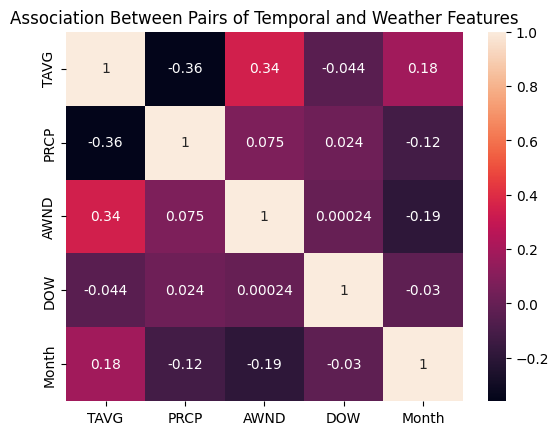

In [ ]:
corr_df = combined_df[['TAVG', 'PRCP', 'AWND', 'DOW', 'Month']].corr()
sns.heatmap(corr_df, annot=True)
plt.title('Association Between Pairs of Temporal and Weather Features');

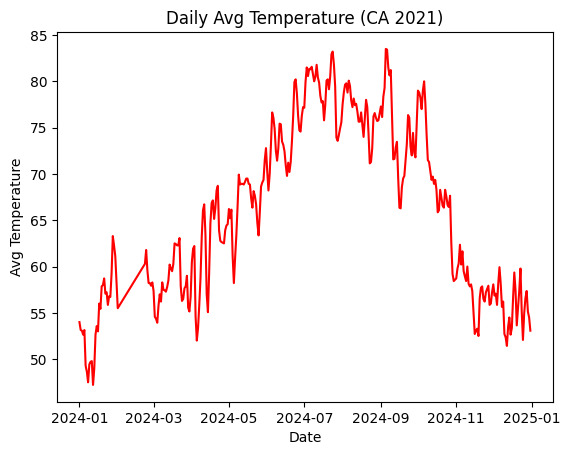

In [ ]:
plt.plot(combined_df['date'], combined_df['TAVG'], color ='red')
plt.xlabel('Date')
plt.ylabel('Avg Temperature')
plt.title('Daily Avg Temperature (CA 2021)');

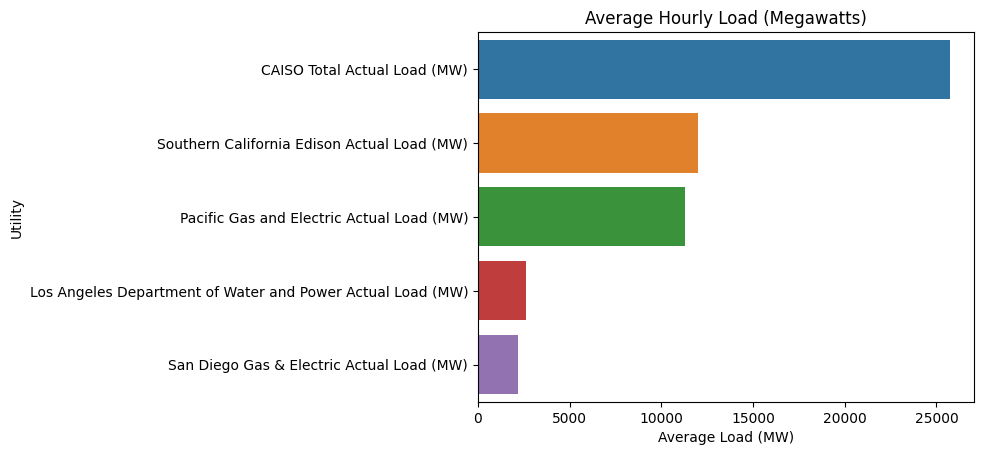

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Pacific Gas and Electric Actual Load (MW)', 'Southern California Edison Actual Load (MW)',
        'San Diego Gas & Electric Actual Load (MW)', 'San Diego Gas & Electric Actual Load (MW)',
        'Los Angeles Department of Water and Power Actual Load (MW)', 'CAISO Total Actual Load (MW)']

avg_load = eia_df[cols].mean().sort_values(ascending=False)

sns.barplot(x=avg_load.values, y=avg_load.index, hue=avg_load.index, legend=False)
plt.title('Average Hourly Load (Megawatts)')
plt.xlabel('Average Load (MW)')
plt.ylabel('Utility');

# Random Forest

In [ ]:
feats=['TAVG', 'PRCP', 'AWND', 'DOW', 'Month']
X = combined_df[feats]
y = combined_df.loc[X.index, 'CAISO Total Actual Load (MW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80-20 split

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('R^2:', r2_score(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

R^2: 0.8830184246768665
RMSE: 1504.2201072035025


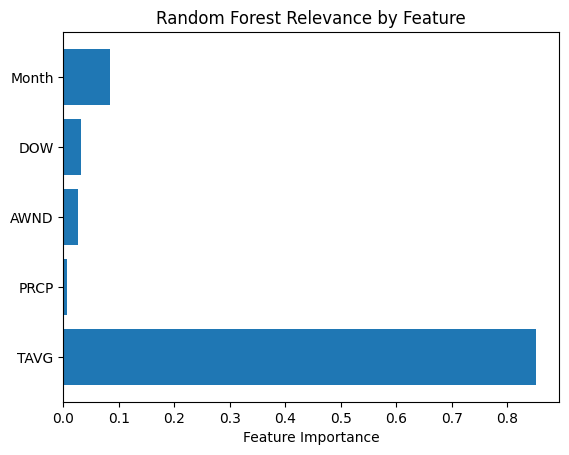

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Relevance by Feature');

# GLM
Model Comparison
- model 1

In [ ]:
X = combined_df[['DOW', 'Month', 'AWND', 'PRCP', 'TAVG']]
X = sm.add_constant(X)
y = combined_df['CAISO Total Actual Load (MW)']

model = sm.GLM(y, X, family = sm.families.Gaussian())
results = model.fit()
print(results.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     CAISO Total Actual Load (MW)   No. Observations:                  345
Model:                                      GLM   Df Residuals:                      339
Model Family:                          Gaussian   Df Model:                            5
Link Function:                         Identity   Scale:                      5.4917e+06
Method:                                    IRLS   Log-Likelihood:                -3163.5
Date:                          Tue, 13 May 2025   Deviance:                   1.8617e+09
Time:                                  00:23:47   Pearson chi2:                 1.86e+09
No. Iterations:                               3   Pseudo R-squ. (CS):             0.8658
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

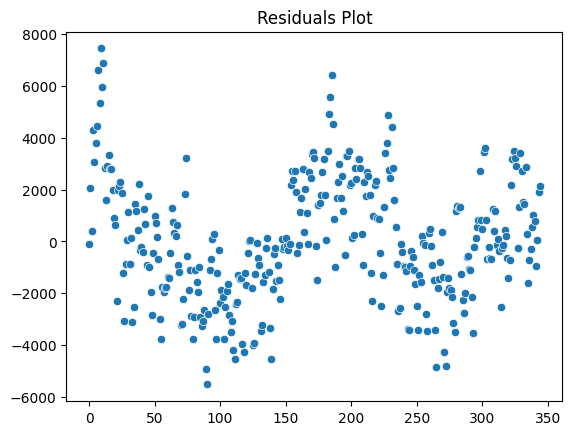

In [ ]:
residuals = y - results.predict(X)
sns.scatterplot(residuals)
plt.title('Residuals Plot');

- model 2

In [ ]:
X = combined_df[['DOW', 'Month', 'AWND', 'TAVG']]
X = sm.add_constant(X)
y = combined_df['CAISO Total Actual Load (MW)']

model = sm.GLM(y, X, family = sm.families.Gaussian())
results = model.fit()
print(results.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     CAISO Total Actual Load (MW)   No. Observations:                  345
Model:                                      GLM   Df Residuals:                      340
Model Family:                          Gaussian   Df Model:                            4
Link Function:                         Identity   Scale:                      5.8198e+06
Method:                                    IRLS   Log-Likelihood:                -3174.0
Date:                          Tue, 13 May 2025   Deviance:                   1.9787e+09
Time:                                  00:24:15   Pearson chi2:                 1.98e+09
No. Iterations:                               3   Pseudo R-squ. (CS):             0.8407
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

- model 3

In [ ]:
X = combined_df[['DOW', 'Month', 'AWND']]
X = sm.add_constant(X)
y = combined_df['CAISO Total Actual Load (MW)']

model1 = sm.GLM(y, X, family = sm.families.Gaussian())
results = model1.fit()
print(results.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     CAISO Total Actual Load (MW)   No. Observations:                  345
Model:                                      GLM   Df Residuals:                      341
Model Family:                          Gaussian   Df Model:                            3
Link Function:                         Identity   Scale:                      1.3794e+07
Method:                                    IRLS   Log-Likelihood:                -3323.4
Date:                          Tue, 13 May 2025   Deviance:                   4.7036e+09
Time:                                  00:24:43   Pearson chi2:                 4.70e+09
No. Iterations:                               3   Pseudo R-squ. (CS):             0.1832
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------